# Regression with Scikit Learn - Machine Learning with Python

## Project Outline

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables
- Using categorical features for machine learning
- Other models and techniques for regression using Scikit-learn
- Applying linear regression to other datasets

## 🧱 Problem Statement

This project takes a practical and coding-focused approach to understanding **machine learning** and **linear regression** through a real-world engineering challenge. We'll define key terms and work step-by-step through a typical machine learning workflow using a structured dataset.

> **QUESTION**: You are a data scientist working at **Ultra Tech Ltd.**, a company specializing in optimizing concrete mixtures for large-scale construction projects. Your goal is to **develop a predictive system that can estimate the compressive strength of concrete**, a critical performance metric, based on its ingredient composition and curing age.
>
> Accurate early prediction of compressive strength helps civil engineers and contractors optimize the mix design to ensure both safety and cost-effectiveness, **without waiting 28 days** for physical testing results.
>
> You’ve been given a [dataset on Kaggle](https://www.kaggle.com/datasets/maajdl/yeh-concret-data) originally published by Professor I-Cheng Yeh, which contains **1,030 concrete samples** with the following laboratory-measured input features:
>
> - Cement (kg/m³)  
> - Blast Furnace Slag (kg/m³)  
> - Fly Ash (kg/m³)  
> - Water (kg/m³)  
> - Superplasticizer (kg/m³)  
> - Coarse Aggregate (kg/m³)  
> - Fine Aggregate (kg/m³)  
> - Age (days)
>
> The target variable is the **compressive strength** of the concrete (in megapascals).
>
> Your task is to explore the dataset, understand the feature relationships, build a **linear regression model using Scikit-learn**, and evaluate its performance — while ensuring the results can be interpreted and trusted by civil engineers in the field.


In [8]:
# Step 1: Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Step 2: Load the dataset
df = pd.read_csv("Concrete_Data_Yeh.csv")
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


The dataset contains **1030 rows and 9 columns**. Each row represents the details of a unique concrete sample prepared and tested under controlled conditions.

Our objective is to estimate the value in the **"Concrete compressive strength (MPa, megapascals)"** column using the values in the other columns. If we can build a reliable model using historical lab data, we should be able to **predict the strength of new concrete mixtures** by simply providing input values like the amount of **cement, water, coarse/fine aggregate, additives, and curing age**.

Let's begin by checking the **data types** and structure of each column in the dataset.


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


Looks like all features are **numerical** (mostly floats), with no missing values — this makes preprocessing straightforward. The **`age`** column is stored as an integer, while the rest (including the target `csMPa`) are floating-point numbers.

Let’s now take a look at some **summary statistics** for the numerical columns in the dataset.

In [20]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Age

The **`age`** column is a numeric feature that indicates how many days the concrete mixture was cured before measuring its compressive strength. The minimum age in the dataset is **1 day**, and the maximum is **365 days**. Since the values span over a wide range, with several repeated values like 1, 3, 7, 14, 28, etc., we can visualize the distribution of curing age using a histogram and a box plot.

This helps us understand how often samples are tested at certain standard curing periods (e.g., 7, 28 days), and whether there are any outliers or uncommon curing times. We’ll use `plotly` to create an interactive histogram, but the same can be done using `matplotlib` or `seaborn`.

Let’s begin by examining some summary statistics:

In [23]:
df.age.describe()

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

## Visualizations 


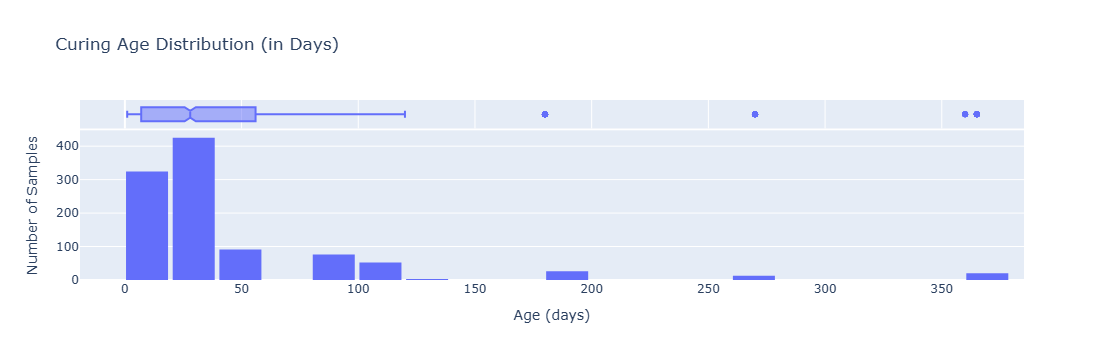

In [40]:
import plotly.express as px

fig = px.histogram(df,
                   x='age',
                   marginal='box',
                   nbins=30,
                   title='Curing Age Distribution (in Days)')

fig.update_layout(bargap=0.1,
                  xaxis_title='Age (days)',
                  yaxis_title='Number of Samples')

fig.show()


The distribution of **curing ages** in the dataset is clearly **non-uniform**. There are noticeable spikes at certain standard testing periods such as **1, 3, 7, 14, 28, 56, 90, and 365 days** — which are commonly used intervals in concrete strength testing.

This pattern reflects industry practice, where engineers often test compressive strength at predefined curing intervals (especially 7 and 28 days, which are considered benchmarks). The rest of the age values are more sparsely distributed, with fewer samples at uncommon intervals.

This **non-uniform distribution** is important to consider, as it may introduce some bias in the model’s predictions, favoring age ranges with more data points.


### Cement

Let's look at the distribution of **cement quantity** (in kg per cubic meter) used in the concrete mixtures. Cement is one of the most critical components influencing the final compressive strength. Understanding how it varies across samples can help us evaluate its contribution to strength prediction.

We'll use a histogram with a box plot to explore the distribution.


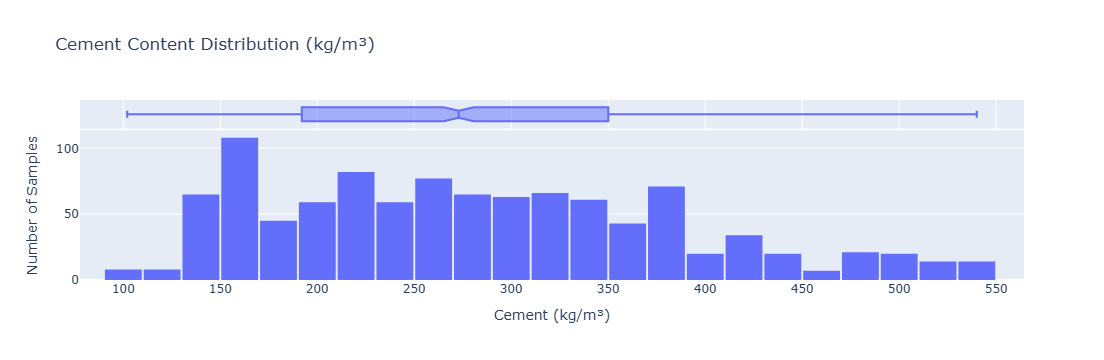

In [46]:
import plotly.express as px

fig = px.histogram(df,
                   x='cement',
                   marginal='box',
                   title='Cement Content Distribution (kg/m³)')

fig.update_layout(bargap=0.05,
                  xaxis_title='Cement (kg/m³)',
                  yaxis_title='Number of Samples')

fig.show()


### Compressive Strength (`csMPa`)

Let's visualize the distribution of **concrete compressive strength** (`csMPa`) — this is the target variable we're trying to predict. 

To gain more insight, we'll also use a color hue to distinguish between **short-term** (≤28 days) and **long-term** (>28 days) curing samples, as curing time heavily influences final strength. This allows us to observe how strength values differ based on curing period.


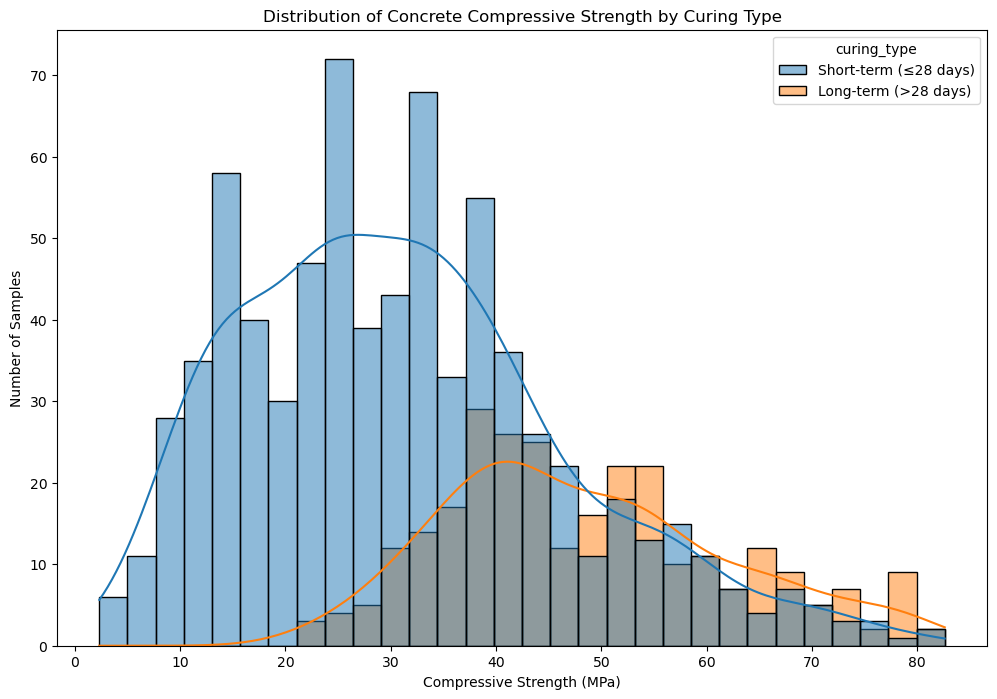

In [53]:


# Create a new column to categorize curing age
df['curing_type'] = df['age'].apply(lambda x: 'Short-term (≤28 days)' if x <= 28 else 'Long-term (>28 days)')

plt.figure(figsize=(12, 8))
sns.histplot(df, x='csMPa', hue='curing_type', bins=30, kde=True)
plt.title('Distribution of Concrete Compressive Strength by Curing Type')
plt.xlabel('Compressive Strength (MPa)')
plt.ylabel('Number of Samples')
plt.show()


Let's visualize the distribution of **concrete compressive strength (`csMPa`)**, the target variable we're predicting. 

We use color to distinguish between **short-term** and **long-term curing** (based on whether the concrete was tested within or after 28 days), to better understand how curing time influences final strength.


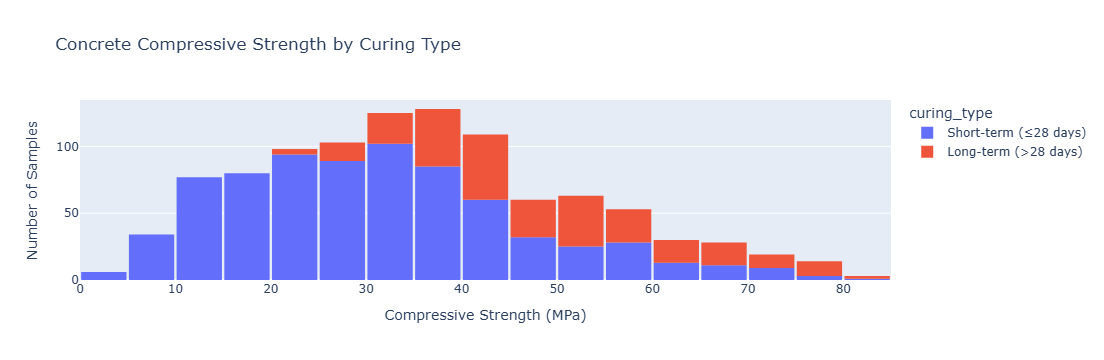

In [58]:
import plotly.express as px

# Create a new column categorizing curing type based on age
df['curing_type'] = df['age'].apply(lambda x: 'Short-term (≤28 days)' if x <= 28 else 'Long-term (>28 days)')

fig = px.histogram(df,
                   x='csMPa',
                   color='curing_type',
                   title='Concrete Compressive Strength by Curing Type')

fig.update_layout(bargap=0.05,
                  xaxis_title='Compressive Strength (MPa)',
                  yaxis_title='Number of Samples')

fig.show()


### Curing Type

Let's visualize the distribution of **`curing_type`** (short-term vs long-term) using a histogram, and group the bars by **cement content level** (high vs low).

It appears that a significant proportion of concrete samples are cured for 28 days or less — likely because 28 days is the industry standard for strength testing. We also observe that **longer curing times are more commonly associated with higher cement content**, possibly because mixes with more cement are expected to continue gaining strength over time.

This kind of analysis can help us understand the interaction between key features and how they influence strength outcomes.


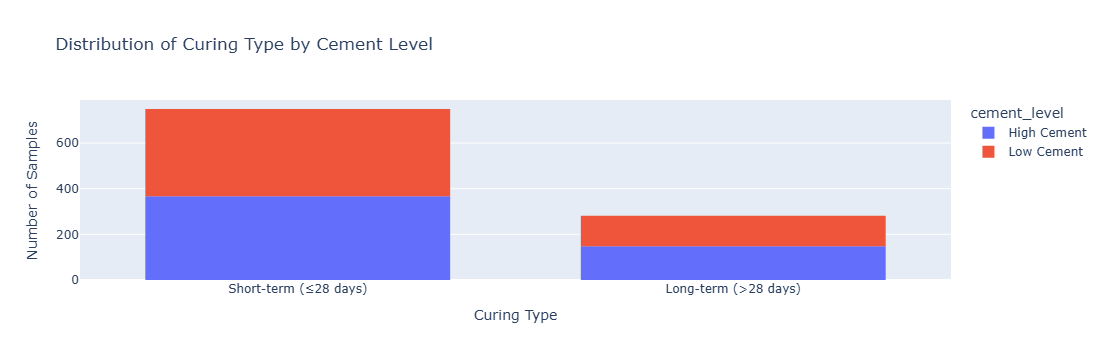

In [61]:

df['cement_level'] = df['cement'].apply(lambda x: 'High Cement' if x > df['cement'].median() else 'Low Cement')

# Plot distribution of curing type by cement level
fig = px.histogram(df,
                   x='curing_type',
                   color='cement_level',
                   title='Distribution of Curing Type by Cement Level')

fig.update_layout(bargap=0.3,
                  xaxis_title='Curing Type',
                  yaxis_title='Number of Samples')

fig.show()


### Age vs Compressive Strength

Let’s now explore the relationship between **curing age** and the **compressive strength (`csMPa`)**, which is the target variable.

Each point in the scatter plot below represents one concrete sample. We've used the `curing_type` column (short-term vs long-term) to color the points. As expected, we observe that **longer curing durations generally lead to higher compressive strength**, although there is considerable variation depending on the specific mix components.

This scatter plot helps confirm the known engineering principle that **concrete gains strength over time**, especially in the first 28 days.


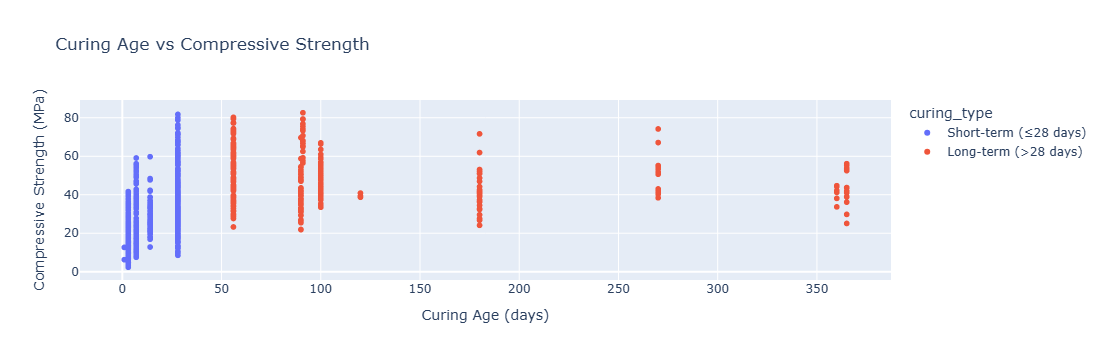

In [64]:


fig = px.scatter(df,
                 x='age',
                 y='csMPa',
                 color='curing_type',
                 title='Curing Age vs Compressive Strength')

fig.update_layout(xaxis_title='Curing Age (days)',
                  yaxis_title='Compressive Strength (MPa)')

fig.show()


### Observations: Curing Age vs Compressive Strength

We can make the following observations from the scatter plot above:

- The general trend shows that **compressive strength increases with curing age**, especially in the first 28 days. This aligns with the well-established behavior of concrete gaining strength over time as hydration progresses.

- However, there is **considerable variation at each curing age**, especially around the 7 to 28-day mark. This suggests that **curing age alone cannot reliably predict compressive strength** — other mix design features like cement content, water ratio, and additives play a major role.

- We can visually identify three general **clusters** in the data:
  - The **first and largest cluster** includes short-term cured samples (≤28 days), many of which show moderate strength values, but with high variability. These are likely mixes that haven't fully developed their strength.
  - The **second cluster** comprises both short- and long-term cured samples with moderate to high strength — possibly due to **optimized mix designs** using higher cement or superplasticizer.
  - The **third cluster** consists of **long-term cured samples** (>28 days) that achieve very high compressive strength — these are likely **high-performance mixes** that continue gaining strength well beyond standard testing ages.

This plot confirms that **curing age is a critical factor**, but **not the only one**, in predicting concrete strength.


### Cement vs Compressive Strength

This scatter plot shows the relationship between **cement content** and **compressive strength (`csMPa`)**. As expected, we observe a general **upward trend** — higher cement content typically leads to higher strength.

We've used the `curing_type` column to distinguish between short-term and long-term cured samples. Long-term cured mixes tend to show consistently higher strength values for similar cement dosages.

However, there is considerable **variation at each cement level**, indicating that other factors like water content, superplasticizer dosage, and aggregate proportions also influence strength. Cement alone cannot reliably predict strength without accounting for the rest of the mix.


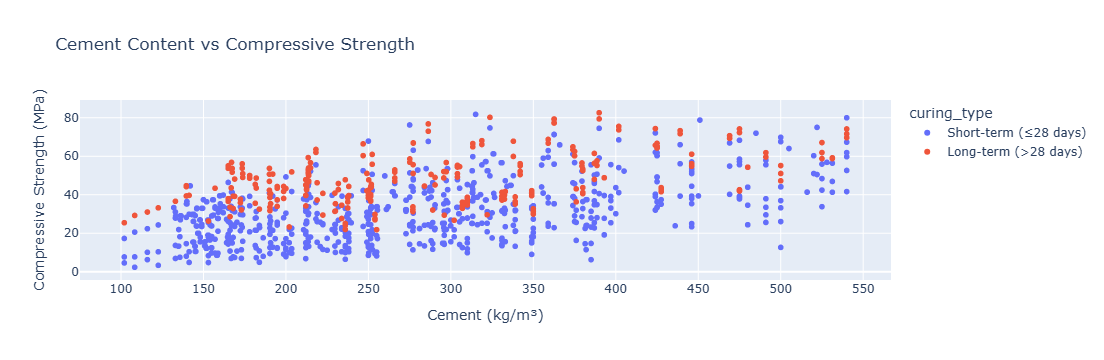

In [68]:


fig = px.scatter(df,
                 x='cement',
                 y='csMPa',
                 color='curing_type',
                 title='Cement Content vs Compressive Strength')

fig.update_layout(xaxis_title='Cement (kg/m³)',
                  yaxis_title='Compressive Strength (MPa)')

fig.show()


### Observations: Cement vs Compressive Strength

Here are some insights based on the scatter plot above:

- **For short-term cured samples (≤28 days)**, increasing cement content generally leads to higher compressive strength, but the relationship isn't perfectly linear. There's considerable variation due to limited hydration time and the influence of other mix components (e.g. water, admixtures).

- **For long-term cured samples (>28 days)**, the relationship is clearer — higher cement content tends to produce significantly greater strength, especially beyond 400 kg/m³.

- In the **lower cement range (below 200 kg/m³)**, most samples show compressive strengths below 30 MPa regardless of curing duration. These likely represent lean mixes or mixes for non-structural use.

- Interestingly, **some short-term cured samples with high cement content** still show only moderate strength. This might indicate that curing duration plays a critical role, and **cement content alone isn't sufficient** for strength gain if proper curing time isn't provided.

### What else can we infer?
- The **spread of strength values increases** with cement dosage — meaning **high cement mixes are more sensitive to other factors** like water ratio and curing.
- This suggests the **interaction between cement and age** is important — maybe worth modeling as a combined feature or interaction term in regression.



## 🔍 Feature Correlation with Concrete Strength (`csMPa`)

We can now examine how each feature in the dataset correlates with the target variable `csMPa` (Concrete Compressive Strength). We'll use a **dotted line chart** to visualize all correlations side by side.

This will help us quickly identify which features are most influential in predicting concrete strength.


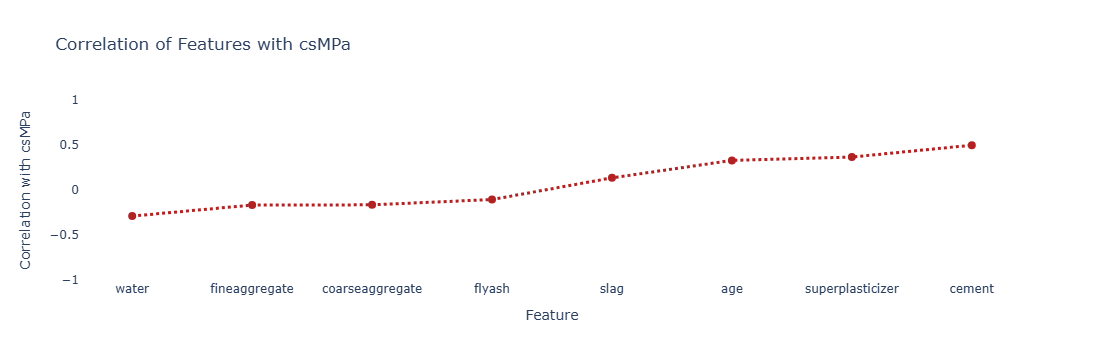

In [83]:
import plotly.express as px

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlations with csMPa and sort them
corr_values = numeric_df.corr()['csMPa'].drop('csMPa').sort_values()

# Create a line chart with dotted lines and markers
fig = px.line(
    x=corr_values.index,
    y=corr_values.values,
    markers=True,
    title='Correlation of Features with csMPa',
    labels={'x': 'Feature', 'y': 'Correlation Coefficient'}
)

# Style the line as dotted
fig.update_traces(
    line=dict(dash='dot', width=3, color='firebrick'),
    marker=dict(size=8)
)

# Adjust layout for better readability
fig.update_layout(
    yaxis_range=[-1, 1],
    xaxis_title='Feature',
    yaxis_title='Correlation with csMPa',
    plot_bgcolor='white'
)

fig.show()


## 📈 Linear Regression using a Single Feature

We now know that the "cement" column has one of the strongest correlations with `csMPa` (Concrete Compressive Strength). Let's try to estimate the value of `csMPa` using just the amount of `cement`.

We'll begin by creating a new DataFrame that includes only the columns `cement` and `csMPa`.


In [89]:
# Create a DataFrame with only the 'cement' and 'csMPa' columns
single_feature_df = df[['cement', 'csMPa']]
single_feature_df


,cement,csMPa
0,540.0,79.99
1,540.0,61.89
2,332.5,40.27
3,332.5,41.05
4,198.6,44.30
...,...,...
1025,276.4,44.28
1026,322.2,31.18
1027,148.5,23.70
1028,159.1,32.77


## 📊 Visualizing the Relationship between Cement and Concrete Strength

Before we apply linear regression, let's visualize how the compressive strength (`csMPa`) varies with the amount of `cement`. We'll use a scatter plot to see if there's a linear trend.


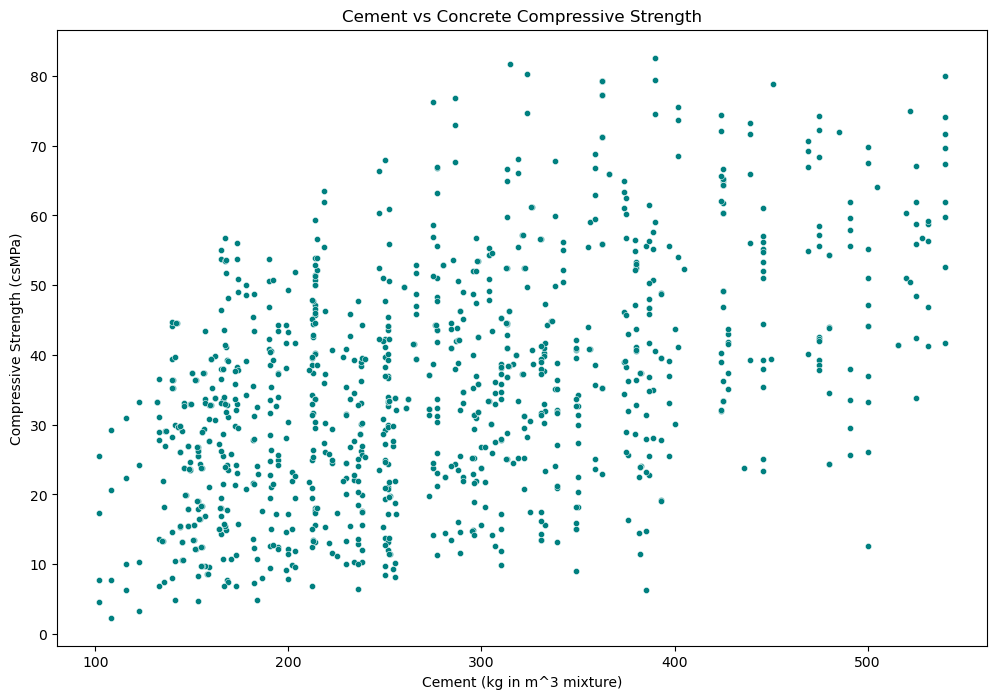

In [92]:


plt.figure(figsize=(12, 8))

# Create scatter plot
sns.scatterplot(data=df, x='cement', y='csMPa', s=20, color='teal')

# Set title and axis labels
plt.title('Cement vs Concrete Compressive Strength')
plt.xlabel('Cement (kg in m^3 mixture)')
plt.ylabel('Compressive Strength (csMPa)')

plt.show()


## 📈 Linear Regression using a Single Feature

Apart from a few exceptions, the points in the scatter plot of **cement vs csMPa** seem to form a line. We'll now try to "fit" a line through these points, and then use the line to **predict the compressive strength** of concrete given the amount of cement in the mix.

A line in X-Y coordinates can be defined using the equation:

y = m * x + b


This line is characterized by two numbers:
- **`m`** → the slope (how steep the line is),
- **`b`** → the intercept (where the line crosses the Y-axis).

In our case:
- **X** = `cement` (input),
- **Y** = `csMPa` (target/output).

So we’re assuming a relationship like:

csMPa = m * cement + b


This technique is called **linear regression**, and the equation is known as a **linear regression model**, because it models the relationship between the input and output as a straight line.

- `m` and `b` are called the **parameters or weights** of the model.
- The values in the `cement` column are the **inputs**.
- The values in the `csMPa` column are the **targets**.

We'll now define a helper function `estimate_strength()` to compute the compressive strength given a value of cement and the weights `m` and `b`.


In [95]:
# Define a helper function to estimate strength using a linear model
def estimate_strength(cement, slope, intercept):
    return slope * cement + intercept


## 🔮 Estimating Strength using a Guessed Line

The `estimate_strength` function is our very first model.

Let’s guess the values of the slope (**`m`**) and the intercept (**`b`**) for the linear equation:
We'll then use these guessed values to estimate the compressive strength of concrete for some sample data points.
Let’s try:
- `m` (slope) = 0.1
- `b` (intercept) = 10

We'll use these to compute estimated values of `csMPa` for given amounts of `cement`.


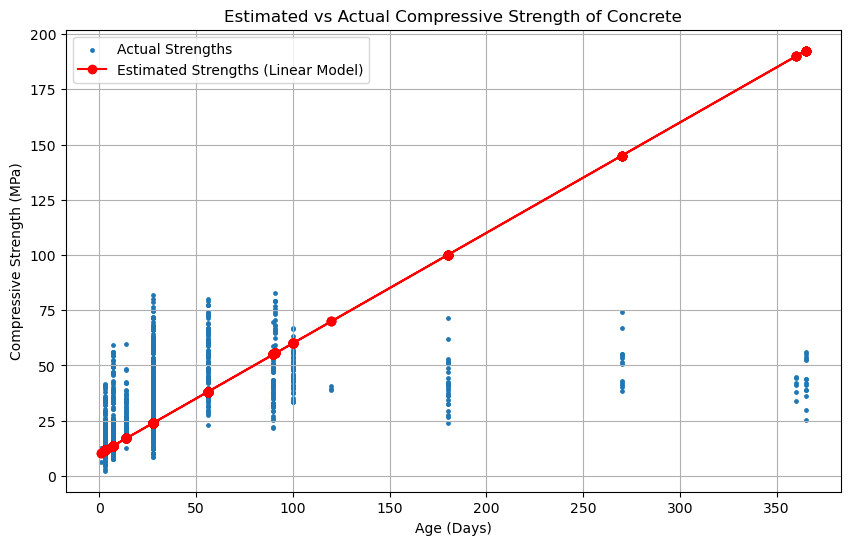

In [103]:

def estimate_strength(age, w, b):
    return w * age + b

# Guessed values for slope and intercept
w = 0.5
b = 10

# Inputs and predictions
ages = df.age
estimated_strengths = estimate_strength(ages, w, b)
actual_strengths = df.csMPa

# Plot actual vs estimated
plt.figure(figsize=(10, 6))
plt.scatter(ages, actual_strengths, s=6, label='Actual Strengths')
plt.plot(ages, estimated_strengths, 'r-o', label='Estimated Strengths (Linear Model)')
plt.xlabel('Age (Days)')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Estimated vs Actual Compressive Strength of Concrete')
plt.legend()
plt.grid(True)
plt.show()


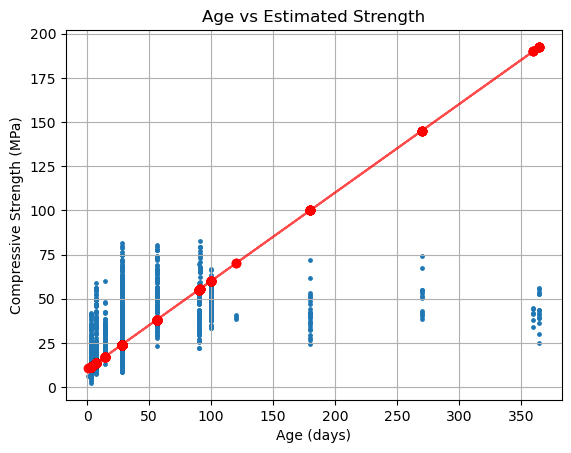

In [105]:
# Feature and Target for Concrete dataset
target = df.csMPa
ages = df.age

# Estimated values using guessed w and b
w = 0.5
b = 10
estimated_strengths = estimate_strength(ages, w, b)

# Plotting
plt.plot(ages, estimated_strengths, 'r-o', alpha=0.7)
plt.scatter(ages, target, s=6)
plt.xlabel('Age (days)')
plt.ylabel('Compressive Strength (MPa)')
plt.title('Age vs Estimated Strength')
plt.grid(True)
plt.show()


In [107]:
def estimate_strength(age, w, b):
    return w * age + b

def try_parameters(w, b):
    # Get features and target
    ages = df.age
    target = df.csMPa

    # Calculate estimated strength
    estimated_strengths = estimate_strength(ages, w, b)

    # Plot estimated line and actual points
    plt.figure(figsize=(10, 6))
    plt.plot(ages, estimated_strengths, 'r-o', alpha=0.7, label='Estimated Line')
    plt.scatter(ages, target, s=6, label='Actual Data')
    plt.xlabel('Age (days)')
    plt.ylabel('Compressive Strength (MPa)')
    plt.title(f'Linear Estimate: w = {w}, b = {b}')
    plt.legend()
    plt.grid(True)
    plt.show()


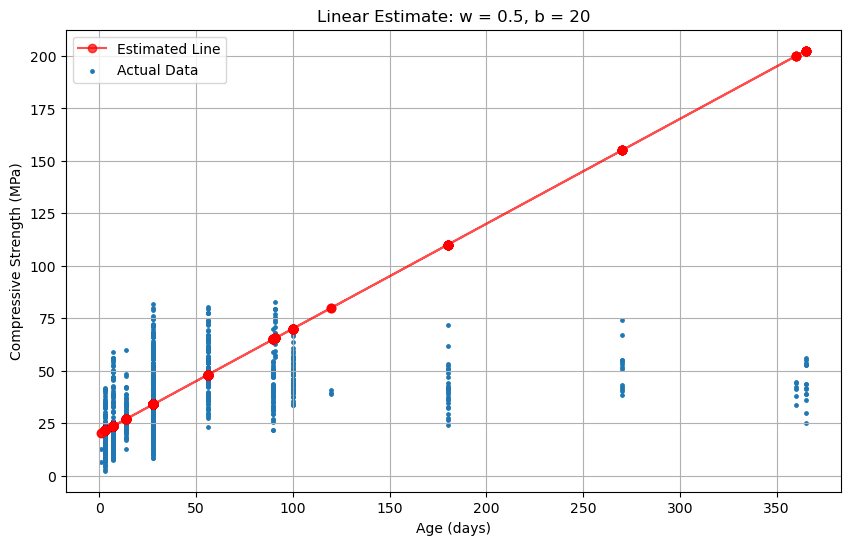

In [119]:
try_parameters(0.5,20)

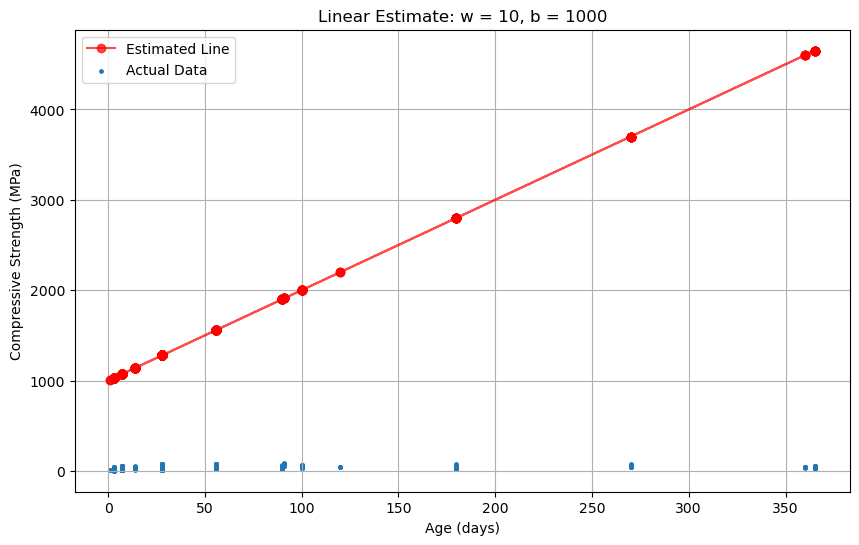

In [123]:
try_parameters(10,1000)

In [129]:


def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions - targets) ** 2))

# Example usage
w = 0.5
b = 10
ages = df.age
true_strength = df.csMPa
predicted_strength = estimate_strength(ages, w, b)

error = rmse(predicted_strength, true_strength)
print(f'Root Mean Squared Error (RMSE): {error:.2f}')


Root Mean Squared Error (RMSE): 30.62


#### Lets modify the try parameters to also display the loss 

In [132]:
def estimate_strength(cement, w, b):
    return w * cement + b

def rmse(targets, predictions):
    return np.sqrt(np.mean((targets - predictions) ** 2))

def try_parameters(w, b):
    x = df['cement']  # Input feature
    y = df['csMPa']   # Actual target
    predictions = estimate_strength(x, w, b)  # Predicted target

    plt.figure(figsize=(8, 5))
    plt.plot(x, predictions, 'r', alpha=0.9, label='Prediction')  # Regression line
    plt.scatter(x, y, s=8, alpha=0.8, label='Actual')             # Actual data points
    plt.xlabel('Cement')
    plt.ylabel('Compressive Strength (csMPa)')
    plt.title('Linear Fit: Cement vs. Strength')
    plt.legend()

    # Calculate RMSE
    loss = rmse(y, predictions)
    print("RMSE Loss:", loss)


RMSE Loss: 14.884795431867502


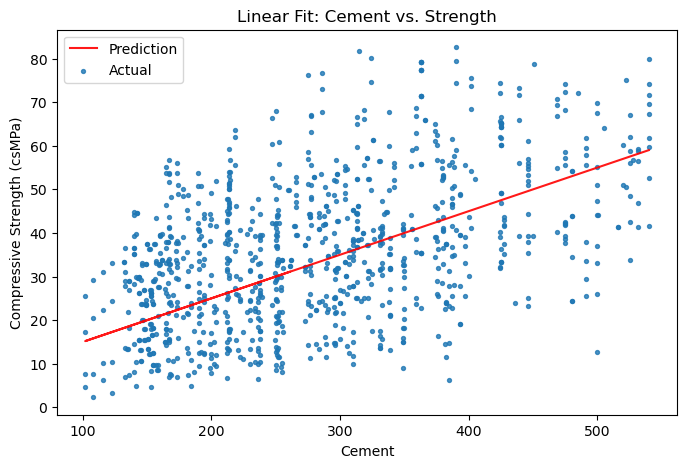

In [134]:
try_parameters(w=0.1, b=5)


### 🔧 Linear Regression using Scikit-learn

In practice, we don't need to manually implement functions to estimate model parameters. We can use the `LinearRegression` class from **scikit-learn**, a popular machine learning library in Python.

Let’s use it to build a simple linear regression model that predicts compressive strength (`csMPa`) based on the amount of cement used (`cement`).


In [137]:
# Reshape cement values into a 2D array (required by scikit-learn)
X = df[['cement']]        # Feature (independent variable)
y = df['csMPa']           # Target (dependent variable)


In [139]:

# Create and train the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [141]:

# Print model parameters
print("Slope (w):", model.coef_[0])
print("Intercept (b):", model.intercept_)


Slope (w): 0.079580335846872
Intercept (b): 13.44252811239991


In [143]:

# Predict compressive strength using the trained model
predictions = model.predict(X)

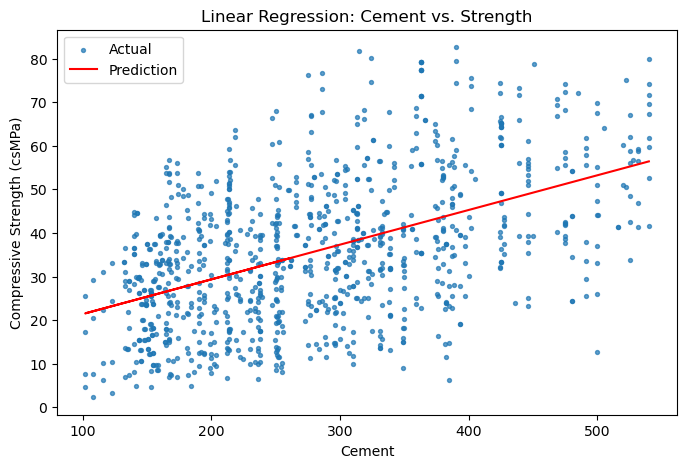

In [145]:

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(df['cement'], y, label='Actual', s=8, alpha=0.7)
plt.plot(df['cement'], predictions, color='red', label='Prediction')
plt.xlabel('Cement')
plt.ylabel('Compressive Strength (csMPa)')
plt.title('Linear Regression: Cement vs. Strength')
plt.legend()
plt.show()

### 📊 Evaluating the Model: RMSE and Parameters

Once we have trained the linear regression model using scikit-learn, we can extract the learned parameters — the **slope** (`model.coef_`) and **intercept** (`model.intercept_`) — and use them to make predictions.

We’ll also compute the **Root Mean Squared Error (RMSE)** to evaluate how well our model is performing.


In [150]:
# Define RMSE function
def rmse(targets, predictions):
    return np.sqrt(np.mean((targets - predictions) ** 2))

# Extract model parameters
w = model.coef_[0]
b = model.intercept_

print("Slope (w):", w)
print("Intercept (b):", b)

# Compute RMSE
targets = y
predictions = model.predict(X)
loss = rmse(targets, predictions)
print("RMSE Loss:", loss)

Slope (w): 0.079580335846872
Intercept (b): 13.44252811239991
RMSE Loss: 14.48141290860653


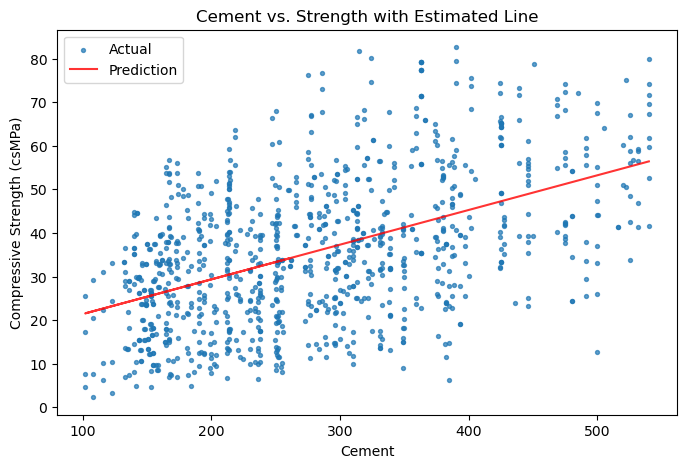

RMSE Loss: 14.48141290860653


In [152]:
def estimate_strength(cement, w, b):
    return w * cement + b

def try_parameters(w, b):
    cement_vals = df['cement']
    actual = df['csMPa']
    predicted = estimate_strength(cement_vals, w, b)
    
    plt.figure(figsize=(8, 5))
    plt.scatter(cement_vals, actual, s=8, alpha=0.7, label='Actual')
    plt.plot(cement_vals, predicted, 'r', alpha=0.8, label='Prediction')
    plt.xlabel('Cement')
    plt.ylabel('Compressive Strength (csMPa)')
    plt.title('Cement vs. Strength with Estimated Line')
    plt.legend()
    plt.show()
    
    print("RMSE Loss:", rmse(actual, predicted))

# Try using the model's parameters
try_parameters(model.coef_[0], model.intercept_)


### 🔁 Linear Regression using Multiple Features

So far, we've used only one feature (e.g., `cement`) to estimate `csMPa` (Concrete Compressive Strength). However, compressive strength is influenced by many factors like:

- Cement
- Water
- Age
- Superplasticizer
- Fly Ash, etc.

We can easily extend our model to include **multiple input features**. In this case, the relationship between features and target is assumed to be:
csMPa = w1 * cement + w2 * water + w3 * age + ... + b


In [158]:
#Select multiple features for prediction
X = df[['cement', 'water', 'age', 'superplasticizer']]  # You can include more
y = df['csMPa']

In [160]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [162]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [164]:
# Make predictions
predictions = model.predict(X_test)

In [166]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 10.694387271926686


In [168]:

# Show model parameters
print("Intercept (b):", model.intercept_)
print("Coefficients (w):", model.coef_)


Intercept (b): 31.4882926333917
Coefficients (w): [ 0.06651811 -0.13286294  0.10735202  0.79178857]


In [170]:

# Combine features with their corresponding weights
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

cement: 0.0665
water: -0.1329
age: 0.1074
superplasticizer: 0.7918


### CORRELATION

Correlation between 'cement' and 'csMPa': 0.4978


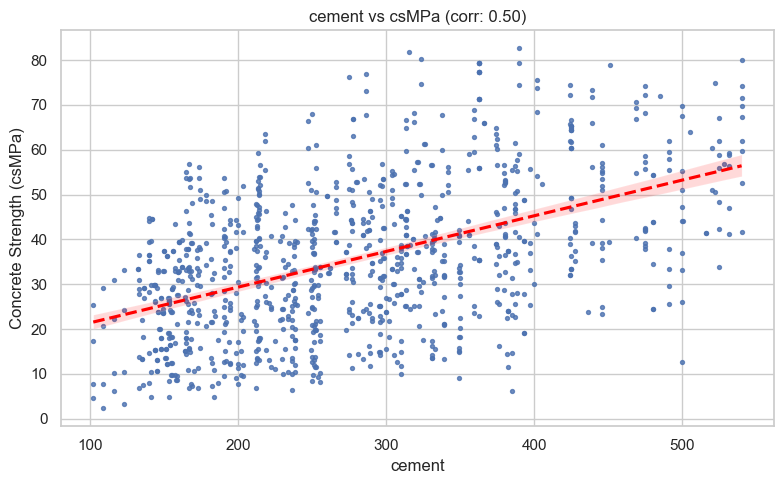

In [173]:
# === 1. Choose the feature to compare with 'csMPa' ===
feature = 'cement'  # Change this to 'slag', 'ash', 'water', etc.

# === 2. Calculate correlation ===
corr = df['csMPa'].corr(df[feature])
print(f"Correlation between '{feature}' and 'csMPa': {corr:.4f}")

# === 3. Choose visualization type ===
# --- Option A: Scatter plot with regression line and optional dotted line ---
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.regplot(x=feature, y='csMPa', data=df, scatter_kws={'s': 8}, line_kws={"linestyle":"--", "color":"red"})
plt.title(f'{feature} vs csMPa (corr: {corr:.2f})')
plt.xlabel(feature)
plt.ylabel('Concrete Strength (csMPa)')
plt.tight_layout()
plt.show()

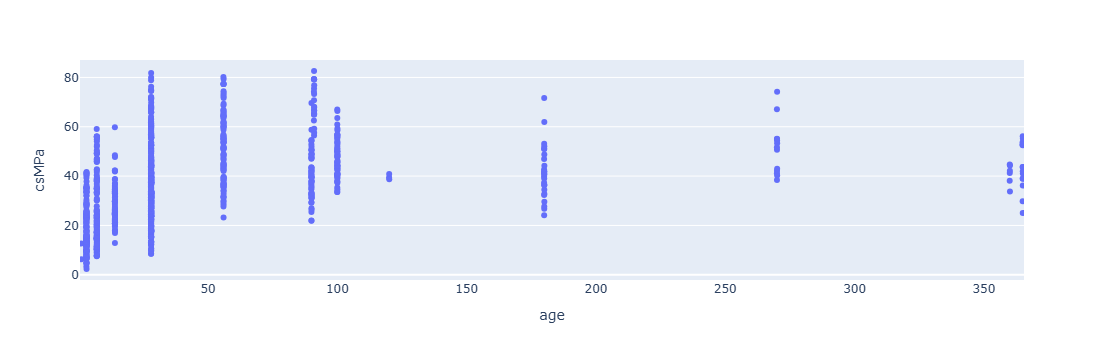

In [177]:
import plotly.express as px

# Cement vs Strength
px.strip(df, x="cement", y="csMPa")

# Slag vs Strength
px.strip(df, x="slag", y="csMPa")

# Flyash vs Strength
px.strip(df, x="flyash", y="csMPa")

# Water vs Strength
px.strip(df, x="water", y="csMPa")

# Superplasticizer vs Strength
px.strip(df, x="superplasticizer", y="csMPa")

# Coarse Aggregate vs Strength
px.strip(df, x="coarseaggregate", y="csMPa")

# Fine Aggregate vs Strength
px.strip(df, x="fineaggregate", y="csMPa")

# Age vs Strength
px.strip(df, x="age", y="csMPa")
